<a href="https://colab.research.google.com/github/Shuichiro-T/gijutsushoten12_get_along_with_estat_program/blob/main/eStat%E3%81%A8%E4%BB%B2%E8%89%AF%E3%81%8F%E3%81%AA%E3%82%8B%E6%9C%AC_%E5%88%86%E6%9E%90%E7%B7%A8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

フォントのインストール、実行後に[ランタイム]-[ランタイムの再起動]を実行する

In [1]:
!curl -O https://moji.or.jp/wp-content/ipafont/IPAexfont/ipaexg00401.zip
!unzip -o ipaexg00401.zip  -d /usr/share/fonts/ 
!rm -r /root/.cache/matplotlib/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 4068k  100 4068k    0     0  3166k      0  0:00:01  0:00:01 --:--:-- 3166k
Archive:  ipaexg00401.zip
   creating: /usr/share/fonts/ipaexg00401/
  inflating: /usr/share/fonts/ipaexg00401/ipaexg.ttf  
  inflating: /usr/share/fonts/ipaexg00401/IPA_Font_License_Agreement_v1.0.txt  
  inflating: /usr/share/fonts/ipaexg00401/Readme_ipaexg00401.txt  


ランタイム再起動後、フォントが使えるかどうか確認する。 "IPAexGothic"があれば使用可能

In [1]:
!cat /root/.cache/matplotlib/*.json | grep IPA


      "name": "IPAexGothic",


アプリケーションIDの設定

In [ ]:
APP_ID = input("アプリケーションIDを入力してください")

メタデータを取得する

In [3]:
import requests

META_INFO_END_POINT = "http://api.e-stat.go.jp/rest/3.0/app/getMetaInfo"

def getMetaInfo(statsDataId=None,\
                explanationGetFlg=None):

  url = META_INFO_END_POINT + "?appId=" + APP_ID + \
    ("&statsDataId=" + statsDataId if statsDataId is not None else "") + \
    ("&explanationGetFlg=" + \
     explanationGetFlg if explanationGetFlg is not None else "") 
  
  result = requests.get(url)

  print("HTTPステータスコード:%s" % (result))

  print("レスポンス:\r\n%s" % (result.text))

getMetaInfo(statsDataId="0003172942", explanationGetFlg="Y")

HTTPステータスコード:<Response [200]>
レスポンス:
<?xml version="1.0" encoding="UTF-8" standalone="yes"?>
<GET_META_INFO xsi:noNamespaceSchemaLocation="https://api.e-stat.go.jp/rest/3.0/schema/GetMetaInfo.xsd" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance">
    <RESULT>
        <STATUS>0</STATUS>
        <ERROR_MSG>正常に終了しました。</ERROR_MSG>
        <DATE>2022-01-02T14:06:18.677+09:00</DATE>
    </RESULT>
    <PARAMETER>
        <LANG>J</LANG>
        <STATS_DATA_ID>0003172942</STATS_DATA_ID>
        <EXPLANATION_GET_FLG>Y</EXPLANATION_GET_FLG>
        <DATA_FORMAT>X</DATA_FORMAT>
    </PARAMETER>
    <METADATA_INF>
        <TABLE_INF id="0003172942">
            <STAT_NAME code="00200251">地方財政状況調査</STAT_NAME>
            <GOV_ORG code="00200">総務省</GOV_ORG>
            <STATISTICS_NAME>地方財政状況調査 市町村分 調査表</STATISTICS_NAME>
            <TITLE no="06">市町村税の徴収実績 市町村分</TITLE>
            <CYCLE>年度次</CYCLE>
            <SURVEY_DATE>0</SURVEY_DATE>
            <OPEN_DATE>2021-03-15</OPEN_DATE>
         

統計データ取得呼び出し

In [4]:
import requests

# 統計データ取得を呼び出す。json形式で返却されるエンドポイントを指定する
STATS_DATA_END_POINT = "http://api.e-stat.go.jp/rest/3.0/app/json/getStatsData"

def getStatsData(dataSetId=None,\
                statsDataId=None,\
                lvTab=None,\
                cdTab=None,\
                cdTabFrom=None,\
                cdTabTo=None,\
                lvTime=None,\
                cdTime=None,\
                cdTimeFrom=None,\
                cdTimeTo=None,\
                lvArea=None,\
                cdArea=None,\
                cdAreaFrom=None,\
                cdAreaTo=None,\
                lvCat=None,\
                cdCat=None,\
                cdCatFrom=None,\
                cdCatTo=None,\
                startPosition=None,\
                limit=None,\
                metaGetFlg=None,\
                cntGetFlg=None,\
                explanationGetFlg=None,\
                annotationGetFlg=None,\
                replaceSpChar=None,\
                sectionHeaderFlg=None):
  
  url = STATS_DATA_END_POINT + "?appId=" + APP_ID + \
    ("&dataSetId=" + dataSetId if dataSetId is not None else "") + \
    ("&statsDataId=" + statsDataId if statsDataId is not None else "") + \
    ("&lvTab=" + lvTab if lvTab is not None else "") + \
    ("&cdTab=" + cdTab if cdTab is not None else "") + \
    ("&cdTabFrom=" + cdTabFrom if cdTabFrom is not None else "") + \
    ("&cdTabTo=" + cdTabTo if cdTabTo is not None else "") + \
    ("&lvTime=" + lvTime if lvTime is not None else "") + \
    ("&cdTime=" + cdTime if cdTime is not None else "") + \
    ("&cdTimeFrom=" + cdTimeFrom if cdTimeFrom is not None else "") + \
    ("&cdTimeTo=" + cdTimeTo if cdTimeTo is not None else "") + \
    ("&lvArea=" + lvArea if lvArea is not None else "") + \
    ("&cdArea=" + cdArea if cdArea is not None else "") + \
    ("&cdAreaFrom=" + cdAreaFrom if cdAreaFrom is not None else "") + \
    ("&cdAreaTo=" + cdAreaTo if cdAreaTo is not None else "") + \
    ("".join(
        ["&lvCat" + f"{i+1:02}" + "=" + lvCat[i] for i in range(0,len(lvCat))]
        )  if lvCat is not None else "") + \
    ("".join(
        ["&cdCat" + f"{i+1:02}" + "=" + cdCat[i] for i in range(0,len(cdCat))]
        )  if cdCat is not None else "") + \
    ("".join(
        ["&cdCat" + f"{i+1:02}" + "From=" + cdCatFrom[i] \
         for i in range(0,len(cdCatFrom))]
        )  if cdCatFrom is not None else "") + \
    ("".join(
        ["&cdCat" + f"{i+1:02}" + "To=" + cdCatTo[i] \
         for i in range(0,len(cdCatTo))]
        )  if cdCatTo is not None else "") + \
    ("&startPosition=" + startPosition if startPosition is not None else "") + \
    ("&limit=" + limit if limit is not None else "") + \
    ("&metaGetFlg=" + metaGetFlg if metaGetFlg is not None else "") + \
    ("&cntGetFlg=" + cntGetFlg if cntGetFlg is not None else "") + \
    ("&explanationGetFlg=" + \
     explanationGetFlg if explanationGetFlg is not None else "") + \
    ("&annotationGetFlg=" + \
     annotationGetFlg if annotationGetFlg is not None else "") + \
    ("&replaceSpChar=" + \
     replaceSpChar if replaceSpChar is not None else "") + \
    ("&sectionHeaderFlg=" + \
     sectionHeaderFlg if sectionHeaderFlg is not None else "")
    
  result = requests.get(url)

  return result.text
    
stat_data_text =  getStatsData(statsDataId="0003172942", \
                               cdArea="14100", cdCat=["130","","170,180"])

データの整形

In [6]:
import pandas as pd
import json

# 取得したテキストをPythonのjsonオブジェクトに変換する。
stat_data_dict = json.loads(stat_data_text) #(1)

class_inf_dict = stat_data_dict\
  ["GET_STATS_DATA"]["STATISTICAL_DATA"]["CLASS_INF"]["CLASS_OBJ"] #(2)

class_inf_area_dict = {inf["CLASS"]["@code"] : inf["CLASS"]["@name"] 
                       for inf in class_inf_dict if inf["@id"] == "area"} #(3)

class_inf_time_dict = {inf_s['@code']: inf_s['@name'] 
                       for inf_s in [inf["CLASS"]  
                                     for inf in class_inf_dict 
                                     if inf["@id"] == "time"][0]} #(4)                          

data_inf_df = pd.DataFrame( # (5)
    stat_data_dict["GET_STATS_DATA"]["STATISTICAL_DATA"]["DATA_INF"]["VALUE"])

data_inf_pivot_df = data_inf_df.pivot( # (6)
    index=["@area", "@time"] , columns=["@cat01", "@cat03"], values="$")

data_inf_pivot_df = data_inf_pivot_df.rename(# (7)
    columns={"130":"調定済額_合計"}, level=0)
data_inf_pivot_df = data_inf_pivot_df.rename(# (8)
    columns={"170":"法人均等割", "180":"法人税割"}, level=1)

data_inf_pivot_df = data_inf_pivot_df.rename( # (9)
    index=class_inf_area_dict,level=0)
data_inf_pivot_df = data_inf_pivot_df.rename(
    index=class_inf_time_dict,level=1)

data_inf_pivot_df = data_inf_pivot_df.rename_axis(["市区町村", "年度"]) # (10)

data_inf_pivot_df.columns = data_inf_pivot_df.columns.droplevel(0) # (11)

data_inf_pivot_df = data_inf_pivot_df.reset_index() # (12)

グラフ化する

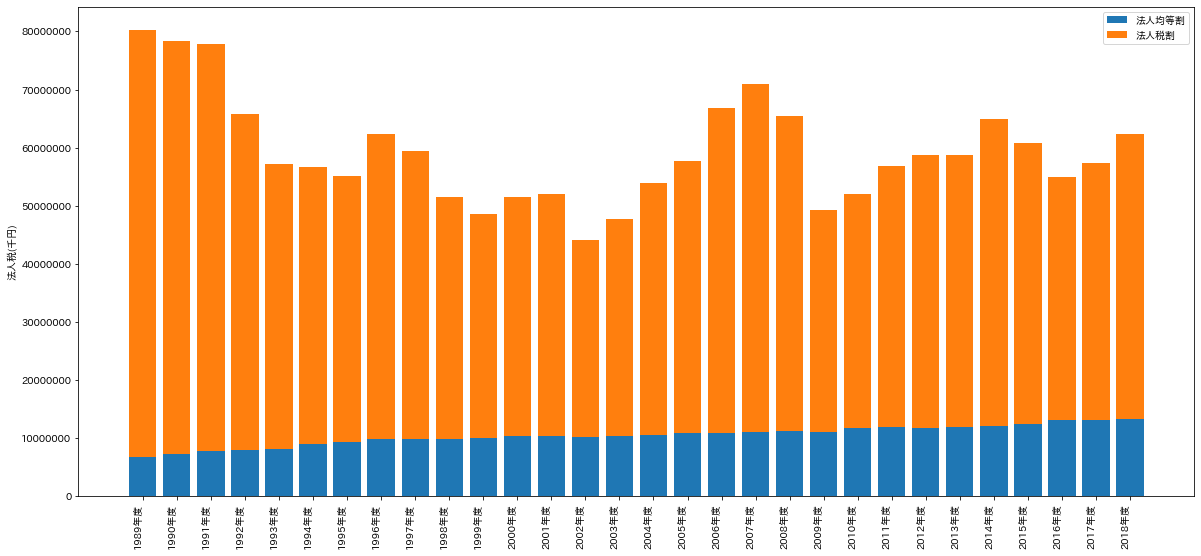

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["font.family"] = "IPAexGothic" #(1)

fig, ax = plt.subplots(figsize=(20, 10)) #(2)

houjinwari = data_inf_pivot_df["法人税割"].astype(int) #(3)
houjinkintou = data_inf_pivot_df["法人均等割"].astype(int) #(4)

ax.bar( #(5)
    data_inf_pivot_df["年度"], houjinkintou, 
    label="法人均等割")
ax.bar( #(6)
    data_inf_pivot_df["年度"], houjinwari, bottom=houjinkintou, 
    label="法人税割")

ax.ticklabel_format(style="plain",axis="y") #(7)

ax.set_ylabel("法人税(千円)") #(8)

fig.autofmt_xdate(rotation=90) #(9)
plt.legend() #(10)

plt.show() #(11)